# Importing The Neccessary Python Packages For Linear Algebra and Data Preprocessing

In [1]:
import numpy as np #Linear Algebra
import pandas as pd #Data Preprocessing

# Introducing Our DataSet

In [2]:
df = pd.read_excel('Dataset.xlsx')
print('The Current Shape of the data', df.shape)
df.head()

The Current Shape of the data (50, 20)


,age,department,distance from home,environment satisfaction,gender,hourly rate,job involvement,job level,job satisfaction,relationship satisfaction,work life balance,years at organisation,years in current role,years since last promotion,Yearly salary,Course studied in the university,disciplinary action,condition of service,closeness to office,still in Crawford or not
0,66,Security,NaN,NaN,M,NaN,"Head, Security Assistant",NaN,NaN,NaN,NaN,4,NaN,2016,205000,"B.Sc, M.Sc",NaN,NaN,NaN,Yes
1,41,Security,NaN,NaN,M,NaN,Chief Security Assist,NaN,NaN,NaN,NaN,12,NaN,2018,201000,"WAEC, B.Sc",NaN,NaN,NaN,Yes
2,65,House Keeping,NaN,NaN,F,NaN,Chief Porter,NaN,NaN,NaN,NaN,11,NaN,2015,65000,"B.Sc, M.Sc",NaN,NaN,NaN,Yes
3,40,ICT,NaN,NaN,M,NaN,Principal Technologist,NaN,NaN,NaN,NaN,2,NaN,2016,75500,"B.TECH,M.I.S",NaN,NaN,NaN,Yes
4,39,Security,NaN,NaN,M,NaN,Security Assistant,NaN,NaN,NaN,NaN,14,NaN,2016,88501,"B.Sc, M.Sc",NaN,NaN,NaN,Yes


# Data Cleaning

In [3]:
df.isnull().sum() # Checking for null values across all columns

age                                  0
department                           0
distance from home                  50
environment satisfaction            50
gender                               0
hourly rate                         50
job involvement                      0
job level                           50
job satisfaction                    50
relationship satisfaction           50
work life balance                   50
years at organisation                0
years in current role               50
years since last promotion           0
Yearly salary                        0
Course studied in the university     0
disciplinary action                 50
condition of service                50
closeness to office                 50
still in Crawford or not             0
dtype: int64

In [4]:
df.isnull().sum().sum() #Total Number of Null Values

550

# Dropping All Columns With Null Values In Order To Avert Errors Hereafter

In [5]:
df.dropna(axis = 1, inplace = True)
df.head()

,age,department,gender,job involvement,years at organisation,years since last promotion,Yearly salary,Course studied in the university,still in Crawford or not
0,66,Security,M,"Head, Security Assistant",4,2016,205000,"B.Sc, M.Sc",Yes
1,41,Security,M,Chief Security Assist,12,2018,201000,"WAEC, B.Sc",Yes
2,65,House Keeping,F,Chief Porter,11,2015,65000,"B.Sc, M.Sc",Yes
3,40,ICT,M,Principal Technologist,2,2016,75500,"B.TECH,M.I.S",Yes
4,39,Security,M,Security Assistant,14,2016,88501,"B.Sc, M.Sc",Yes


In [6]:
print('The new shape is',df.shape) #The Neww Shape Of Our DataSet

The new shape is (50, 9)


In [7]:
df.describe(include = 'all') #Understanding Our Data From A Statistical Point Of View

,age,department,gender,job involvement,years at organisation,years since last promotion,Yearly salary,Course studied in the university,still in Crawford or not
count,50.000000,50,50,50,50.000000,50.000000,50.000000,50,50
unique,NaN,13,2,40,NaN,NaN,NaN,14,2
top,NaN,Registry,M,Clerical Officer,NaN,NaN,NaN,"B.Sc, M.Sc",Yes
freq,NaN,13,28,4,NaN,NaN,NaN,16,40
mean,39.100000,NaN,NaN,NaN,7.140000,2016.640000,93375.160000,NaN,NaN
std,9.562362,NaN,NaN,NaN,3.398739,1.120496,59139.337412,NaN,NaN
min,24.000000,NaN,NaN,NaN,2.000000,2015.000000,25556.000000,NaN,NaN
25%,32.000000,NaN,NaN,NaN,4.000000,2016.000000,48846.750000,NaN,NaN
50%,38.500000,NaN,NaN,NaN,7.000000,2017.000000,82003.500000,NaN,NaN
75%,44.000000,NaN,NaN,NaN,9.750000,2018.000000,109728.750000,NaN,NaN


### The "Yearly Salary" Column Should be Multiplied Across 12 Month As What Is In The DataSet Are The Monthly Salary

In [8]:
df['Yearly salary'] = df['Yearly salary'] * 12
df['Yearly salary'].astype('int64')

df.head()

,age,department,gender,job involvement,years at organisation,years since last promotion,Yearly salary,Course studied in the university,still in Crawford or not
0,66,Security,M,"Head, Security Assistant",4,2016,2460000,"B.Sc, M.Sc",Yes
1,41,Security,M,Chief Security Assist,12,2018,2412000,"WAEC, B.Sc",Yes
2,65,House Keeping,F,Chief Porter,11,2015,780000,"B.Sc, M.Sc",Yes
3,40,ICT,M,Principal Technologist,2,2016,906000,"B.TECH,M.I.S",Yes
4,39,Security,M,Security Assistant,14,2016,1062012,"B.Sc, M.Sc",Yes


### Subtracting The Current Year From The "Years Since Last Promotion" Column So As To Get The Actual Number Of Years Since Last Promotion

In [9]:
for row in df:
    df['years since last promotion'] = 2020-df['years since last promotion'].astype(int)

df

,age,department,gender,job involvement,years at organisation,years since last promotion,Yearly salary,Course studied in the university,still in Crawford or not
0,66,Security,M,"Head, Security Assistant",4,4,2460000,"B.Sc, M.Sc",Yes
1,41,Security,M,Chief Security Assist,12,2,2412000,"WAEC, B.Sc",Yes
2,65,House Keeping,F,Chief Porter,11,5,780000,"B.Sc, M.Sc",Yes
3,40,ICT,M,Principal Technologist,2,4,906000,"B.TECH,M.I.S",Yes
4,39,Security,M,Security Assistant,14,4,1062012,"B.Sc, M.Sc",Yes
5,39,House Keeping,M,Chief Porter,7,2,1177260,"B.Sc, M.Sc",Yes
6,55,Registry,F,Asst. Chief Executive Officer,11,3,1242012,"OND, HND, B.Sc, M.Sc",Yes
7,48,Catering,M,Assist Catering Officer,10,5,915960,"WAEC, B.Sc",Yes
8,48,Registry,F,Higher Technical Officer,5,2,1302660,"B.Sc, M.Sc",Yes
9,47,Catering,F,Principal Catering Officer,14,3,931284,"WAEC, B.Sc",Yes


# 
# 
# 
### Importing The Python Libraries Necessary For Visualizing The DataSet

In [10]:
#Visualization
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
import seaborn as sns

#Configure Visualization Defaults
#%matplotlib inline = show plots in Jupyter Notebook browser
%matplotlib inline
mpl.style.use('ggplot')
sns.set_style('white')
pylab.rcParams['figure.figsize'] = 12,8


EDA_df = df.copy(deep=True) # Creating a copy of our cleaned DataFrame for Visualization purpose

# Visualization
### Chart Showing The Turnover Across Gender, Years at organisation, Age and Department

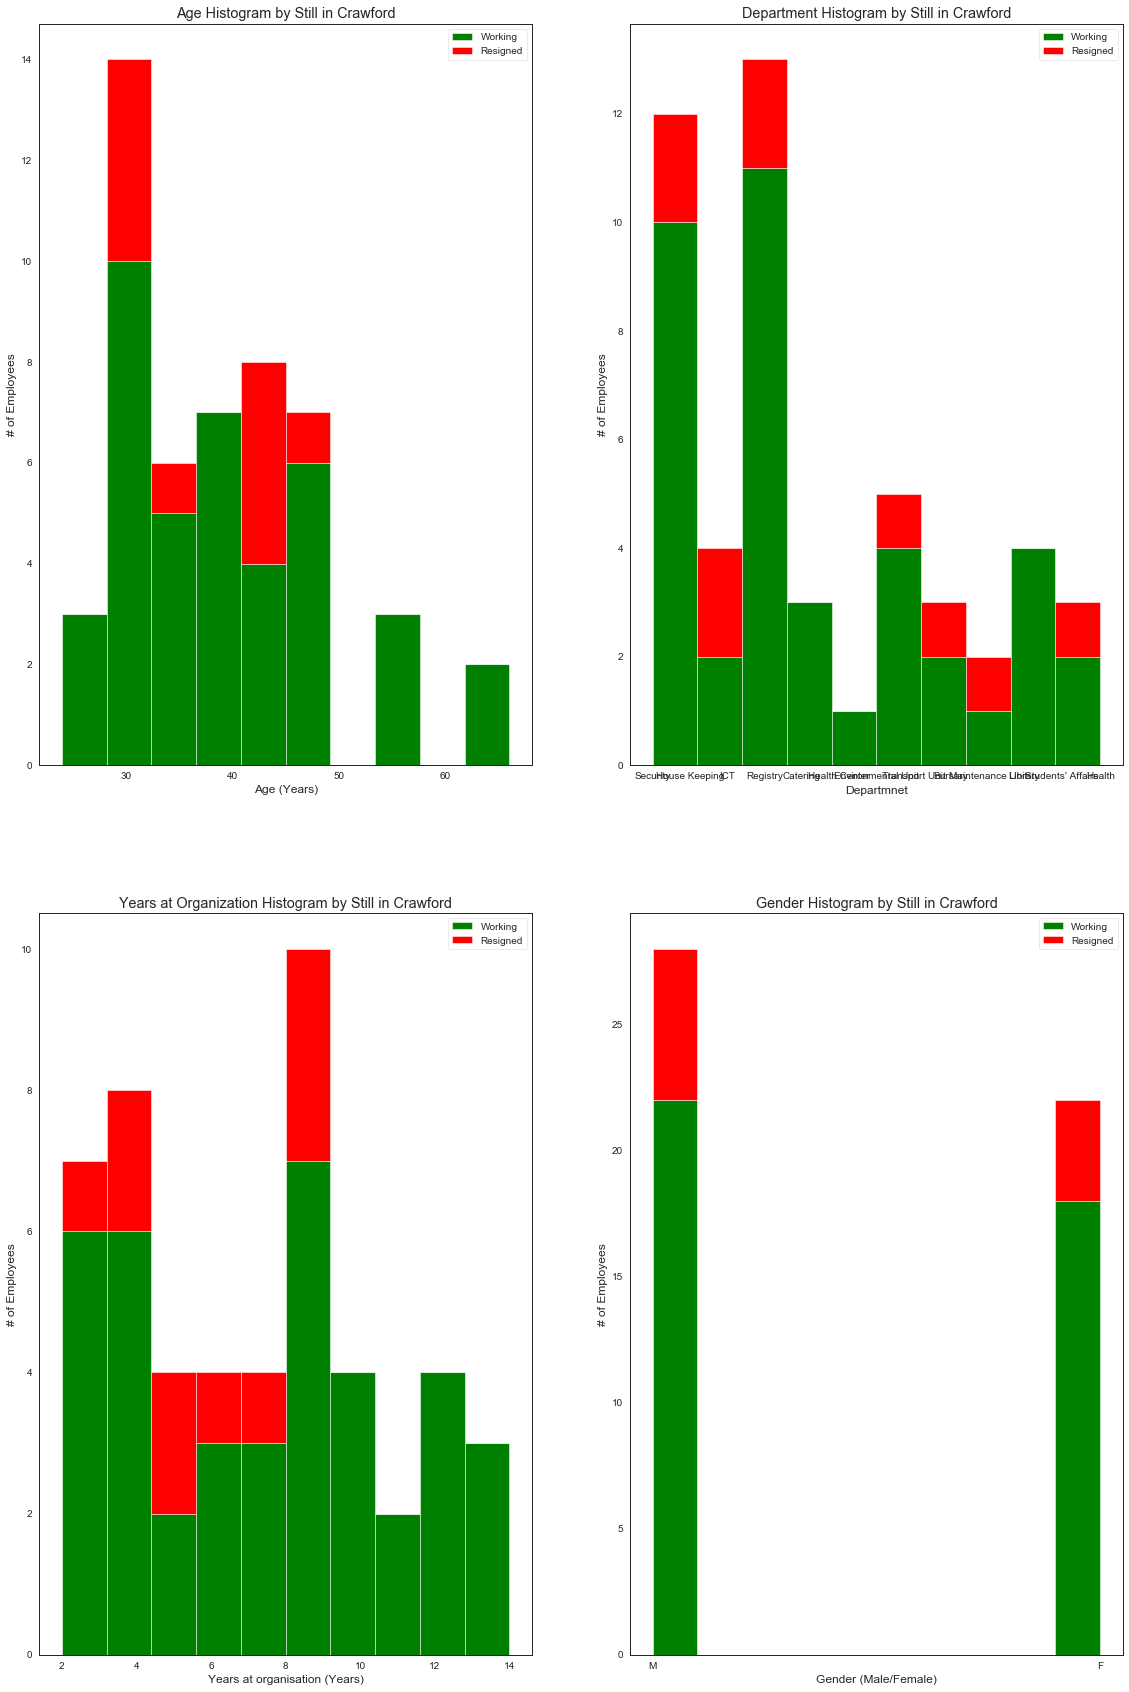

In [11]:

#graph distribution of quantitative data
plt.figure(figsize=[30,30])

plt.subplot(231)
plt.hist(x = [EDA_df[EDA_df['still in Crawford or not']=='Yes']['age'], EDA_df[EDA_df['still in Crawford or not']=='No']['age']], 
         stacked=True, color = ['g','r'],label = ['Working','Resigned'])
plt.title('Age Histogram by Still in Crawford')
plt.xlabel('Age (Years)')
plt.ylabel('# of Employees')
plt.legend()

plt.subplot(232)
plt.hist(x = [EDA_df[EDA_df['still in Crawford or not']=='Yes']['department'], EDA_df[EDA_df['still in Crawford or not']=='No']['department']], 
         stacked=True, color = ['g','r'],label = ['Working','Resigned'])
plt.title('Department Histogram by Still in Crawford')
plt.xlabel('Departmnet')
plt.ylabel('# of Employees')
plt.legend()

plt.subplot(234)
plt.hist(x = [EDA_df[EDA_df['still in Crawford or not']=='Yes']['years at organisation'], EDA_df[EDA_df['still in Crawford or not']=='No']['years at organisation']], 
         stacked=True, color = ['g','r'],label = ['Working','Resigned'])
plt.title('Years at Organization Histogram by Still in Crawford')
plt.xlabel('Years at organisation (Years)')
plt.ylabel('# of Employees')
plt.legend()

plt.subplot(235)
plt.hist(x = [EDA_df[EDA_df['still in Crawford or not']=='Yes']['gender'], EDA_df[EDA_df['still in Crawford or not']=='No']['gender']], 
         stacked=True, color = ['g','r'],label = ['Working','Resigned'])
plt.title('Gender Histogram by Still in Crawford')
plt.xlabel('Gender (Male/Female)')
plt.ylabel('# of Employees')
plt.legend()


# ________________________________________________________________________________________________________________________________
# Feature Engineering

In [12]:

Features_df = df.copy(deep=True) # Creating A Copy of The DataFrame For The Purpose Of PreProcessing

In [13]:
Features_df = pd.get_dummies(Features_df, drop_first = True) # Creating Encodings For The Purose of Modeling

Target = Features_df['still in Crawford or not_Yes'] # The Independent Variable 
target = ['still in Crawford or not_Yes']


Features_df

,age,years at organisation,years since last promotion,Yearly salary,department_Catering,department_Environmental Unit,department_Health,department_Health Center,department_House Keeping,department_ICT,...,"Course studied in the university_B.TECH,M.I.S",Course studied in the university_NCE,"Course studied in the university_OND, HND","Course studied in the university_OND, HND, B.Sc, M.Sc",Course studied in the university_WAEC,"Course studied in the university_WAEC, B.Sc","Course studied in the university_WASC, BLS, MLIS","Course studied in the university_WASC, NCE","Course studied in the university_WASC, ND, HND",still in Crawford or not_Yes
0,66,4,4,2460000,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,41,12,2,2412000,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,1
2,65,11,5,780000,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
3,40,2,4,906000,0,0,0,0,0,1,...,1,0,0,0,0,0,0,0,0,1
4,39,14,4,1062012,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
5,39,7,2,1177260,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
6,55,11,3,1242012,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
7,48,10,5,915960,1,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,1
8,48,5,2,1302660,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
9,47,14,3,931284,1,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,1


 # Dependent Variable

In [14]:
features_df = Features_df.drop(columns=['still in Crawford or not_Yes'], axis=1, inplace=True)
Features_df.head()

,age,years at organisation,years since last promotion,Yearly salary,department_Catering,department_Environmental Unit,department_Health,department_Health Center,department_House Keeping,department_ICT,...,Course studied in the university_B.Sc.,"Course studied in the university_B.TECH,M.I.S",Course studied in the university_NCE,"Course studied in the university_OND, HND","Course studied in the university_OND, HND, B.Sc, M.Sc",Course studied in the university_WAEC,"Course studied in the university_WAEC, B.Sc","Course studied in the university_WASC, BLS, MLIS","Course studied in the university_WASC, NCE","Course studied in the university_WASC, ND, HND"
0,66,4,4,2460000,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,41,12,2,2412000,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
2,65,11,5,780000,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
3,40,2,4,906000,0,0,0,0,0,1,...,0,1,0,0,0,0,0,0,0,0
4,39,14,4,1062012,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### Selecting Two Rows From The DataSet For Testing Purpose

In [15]:
Test_df = Features_df.iloc[34:36, :] 
Test_df.head()

,age,years at organisation,years since last promotion,Yearly salary,department_Catering,department_Environmental Unit,department_Health,department_Health Center,department_House Keeping,department_ICT,...,Course studied in the university_B.Sc.,"Course studied in the university_B.TECH,M.I.S",Course studied in the university_NCE,"Course studied in the university_OND, HND","Course studied in the university_OND, HND, B.Sc, M.Sc",Course studied in the university_WAEC,"Course studied in the university_WAEC, B.Sc","Course studied in the university_WASC, BLS, MLIS","Course studied in the university_WASC, NCE","Course studied in the university_WASC, ND, HND"
34,24,4,2,579048,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
35,43,6,5,903048,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1


### Dropping The Selected Rows From The Train DataSet both for The Independent and Dependent Variables

In [16]:
Features_df.drop(Features_df.index[[34, 35]], inplace=True)

Target.drop(Target.index[[34, 35]], inplace=True)

Target # Rows 34 and 35 Are No Longer Part of The DataSet

# ____________________________________________________________________________________________________________________________________
# Modelling 

In [17]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(Features_df,Target, test_size = 0.3, random_state = 40)

In [18]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
model = RandomForestClassifier(n_estimators=100, bootstrap=True, max_features='sqrt',criterion="entropy",max_depth=6, oob_score=True)
model.fit(X_train, y_train)


y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)

print("Accuracy Score: ", accuracy )

Accuracy Score:  0.7333333333333333


# ________________________________________________________________________________________________________________________
# Prediction

In [19]:
model.fit(Features_df, Target)
test_target = model.predict(Test_df)
test_target

array([1, 0], dtype=uint8)

# The Model Rightly Predicted That Rows 34 and 35 Independent Variables Were Yes and NO(0 and 1; After Encoding) According To Our DataSet
# The Model Can Now Be Used To Predict The TurnOver rate of Staffs in CrawFord University